In [4]:
import pandas as pd
import numpy as np
merged=pd.read_csv("/Users/lennertbontinck/Documents/github/bachelorproef-compressie/resultaten/csv/merged.csv")
merged=merged.loc[merged.extension.isin(['jpg', 'jpf', 'webp'])]
merged=merged.loc[merged.filename.isin([1,2,3,4,5,6,7,8,9,10,11,12,13])]
merged.head()

,image_id,filename,extension,path,practice_data,chrome_not_safari,filesize,participant_id,sharpness,color_contrast,general,gender,age,expertise,colorblind,bad_vision
0,1,1,jpf,evaluatie_afbeeldingen/testreeks/1.jpf,1,0,822933,1,4,5,4,male,20,1,0,0
1,2,1,jpg,evaluatie_afbeeldingen/testreeks/1.jpg,1,1,206934,1,3,2,3,male,20,1,0,0
3,4,1,webp,evaluatie_afbeeldingen/testreeks/1.webp,1,1,84904,1,2,3,3,male,20,1,0,0
4,5,2,jpf,evaluatie_afbeeldingen/testreeks/2.jpf,1,0,1246850,1,4,4,4,male,20,1,0,0
5,6,2,jpg,evaluatie_afbeeldingen/testreeks/2.jpg,1,1,387401,1,2,2,2,male,20,1,0,0


In [5]:
merged['sharpness_size_ratio'] = merged['sharpness'] / merged['filesize']
merged['color_contrast_size_ratio'] = merged['color_contrast'] / merged['filesize']
merged['general_size_ratio'] = merged['general'] / merged['filesize']
merged.head()

,image_id,filename,extension,path,practice_data,chrome_not_safari,filesize,participant_id,sharpness,color_contrast,general,gender,age,expertise,colorblind,bad_vision,sharpness_size_ratio,color_contrast_size_ratio,general_size_ratio
0,1,1,jpf,evaluatie_afbeeldingen/testreeks/1.jpf,1,0,822933,1,4,5,4,male,20,1,0,0,0.000005,0.000006,0.000005
1,2,1,jpg,evaluatie_afbeeldingen/testreeks/1.jpg,1,1,206934,1,3,2,3,male,20,1,0,0,0.000014,0.000010,0.000014
3,4,1,webp,evaluatie_afbeeldingen/testreeks/1.webp,1,1,84904,1,2,3,3,male,20,1,0,0,0.000024,0.000035,0.000035
4,5,2,jpf,evaluatie_afbeeldingen/testreeks/2.jpf,1,0,1246850,1,4,4,4,male,20,1,0,0,0.000003,0.000003,0.000003
5,6,2,jpg,evaluatie_afbeeldingen/testreeks/2.jpg,1,1,387401,1,2,2,2,male,20,1,0,0,0.000005,0.000005,0.000005


In [6]:
sharpness_size_ratio_jpg = merged.loc[merged['extension'] == "jpg"].groupby(['filename'], sort=False)['sharpness_size_ratio'].mean().to_frame()
sharpness_size_ratio_jpg = sharpness_size_ratio_jpg.rename(columns = {'sharpness_size_ratio':'Scherpte/grootte verhouding JPEG'})

color_contrast_size_ratio_jpg = merged.loc[merged['extension'] == "jpg"].groupby(['filename'], sort=False)['color_contrast_size_ratio'].mean().to_frame()
color_contrast_size_ratio_jpg = color_contrast_size_ratio_jpg.rename(columns = {'color_contrast_size_ratio':'Kleur/grootte verhouding JPEG'})

general_size_ratio_jpg = merged.loc[merged['extension'] == "jpg"].groupby(['filename'], sort=False)['general_size_ratio'].mean().to_frame()
general_size_ratio_jpg = general_size_ratio_jpg.rename(columns = {'general_size_ratio':'Algemeen/grootte verhouding JPEG'})





In [7]:
merged_ratios = sharpness_size_ratio_jpg.merge(color_contrast_size_ratio_jpg,on=['filename'])
merged_ratios = merged_ratios.merge(general_size_ratio_jpg,on=['filename'])
merged_ratios = merged_ratios.reset_index()
merged_ratios.index = np.arange(1, len(merged_ratios) + 1)
merged_ratios.head()

,filename,Scherpte/grootte verhouding JPEG,Kleur/grootte verhouding JPEG,Algemeen/grootte verhouding JPEG
1,1,0.000012,0.000011,0.000013
2,2,0.000006,0.000006,0.000007
3,10,0.000013,0.000013,0.000015
4,11,0.000007,0.000007,0.000007
5,12,0.000005,0.000005,0.000005


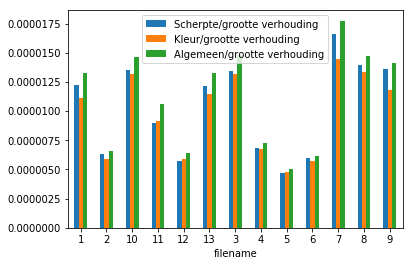

In [9]:
sharpness_size_ratios_jpg = merged_ratios["Scherpte/grootte verhouding JPEG"]
color_contrast_size_ratios_jpg = merged_ratios["Kleur/grootte verhouding JPEG"]
general_size_ratios_jpg = merged_ratios["Algemeen/grootte verhouding JPEG"]
index = merged_ratios["filename"]
df = pd.DataFrame({'Scherpte/grootte verhouding': sharpness_size_ratios_jpg, 'Kleur/grootte verhouding': color_contrast_size_ratios_jpg, 'Algemeen/grootte verhouding': general_size_ratios_jpg}, index=index)
ax = df.plot.bar(rot=0)